# POC Faces de Lote

Para estudar o método foi selecionada uma pequena área para poder testar um método para indetificar e associar cada face do lote ao seu respectivo viário

In [5]:
import geopandas as gpd
from shapely.geometry import Point, LineString, MultiPoint
from shapely.ops import nearest_points

## Abrindo as camadas de lotes e logradouros

In [6]:
gdf_lotes = gpd.read_file('download/poc-teste-faces-lote.gpkg', driver='GPKG', layer='lotes')
gdf_vias = gpd.read_file('download/poc-teste-faces-lote.gpkg', driver='GPKG', layer='logradouros')

## Trabalhando apenas as faces externas da quadra

Para trabalhar apenas com as faces externas da quadra, vamos selecionar uma amostra: setor: *140*, quadra *399*. Para isso vamos filtrar os lotes dessa quadra, dissolver as suas geometrias e então trabalhar apenas com os segmentos da borda exterior

In [3]:
setor, quadra = '140', '399'

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

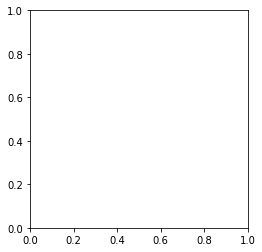

In [4]:
gdf_lotes_poc = gdf_lotes.loc[(gdf_lotes.lo_quadra == quadra) & (gdf_lotes.lo_setor == setor)]
gdf_lotes_poc.plot()

<AxesSubplot:>

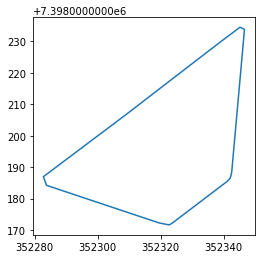

In [139]:
## Observando Buffer de 30cm para dentro do lote para garantir sobreposição
gdf_faces = gdf_lotes_poc.dissolve(by=['lo_quadra', 'lo_setor']).buffer(-.30).boundary
gdf_faces.plot()

## Obter o centroide de cada segmento de linha

Agora é possível obter o centroide de cada segumento de linha, que é com bastante certeza um ponto dentro de um lote

In [158]:
def centroide_por_segmento(linha):
    segmentos = list(map(LineString, zip(linha.coords[:-1], linha.coords[1:])))
    centroides = list(map(lambda x: x.centroid, segmentos))
    return MultiPoint(centroides)

gdf_pontos_faces = gpd.GeoDataFrame(geometry=gdf_faces.apply(lambda x: centroide_por_segmento(x)))

In [159]:
gdf_pontos_faces.reset_index().explode()

lo_quadra lo_setor                        geometry
0 0        399      140  POINT (352306.168 7398176.722)
  1        399      140  POINT (352295.365 7398180.330)
  2        399      140  POINT (352286.520 7398183.284)
  3        399      140  POINT (352283.209 7398185.597)
  4        399      140  POINT (352285.469 7398189.044)
  5        399      140  POINT (352292.488 7398194.320)
  6        399      140  POINT (352299.765 7398199.790)
  7        399      140  POINT (352305.804 7398204.329)
  8        399      140  POINT (352308.842 7398206.613)
  9        399      140  POINT (352308.859 7398206.626)
  10       399      140  POINT (352311.825 7398208.909)
  11       399      140  POINT (352317.863 7398213.557)
  12       399      140  POINT (352323.761 7398218.097)
  13       399      140  POINT (352329.117 7398222.220)
  14       399      140  POINT (352334.949 7398226.709)
  15       399      140  POINT (352341.741 7398231.873)
  16       399      140  POINT (352345.949 7398234.163)
  17       399      140  POINT (352346.042 7398226.884)
  18       399      140  POINT (352345.015 7398215.403)
  19       399      140  POINT (352344.496 7398209.609)
  20       399      140  POINT (352344.372 7398208.224)
  21       399      140  POINT (352344.287 7398207.267)
  22       399      140  POINT (352344.161 7398205.861)
  23       399      140  POINT (352343.969 7398203.719)
  24       399      140  POINT (352343.687 7398200.566)
  25       399      140  POINT (352343.075 7398193.724)
  26       399      140  POINT (352342.473 7398187.838)
  27       399      140  POINT (352342.202 7398186.838)
  28       399      140  POINT (352341.867 7398186.239)
  29       399      140  POINT (352341.375 7398185.709)
  30       399      140  POINT (352339.646 7398184.321)
  31       399      140  POINT (352336.692 7398182.077)
  32       399      140  POINT (352331.982 7398178.501)
  33       399      140  POINT (352326.237 7398174.139)
  34       399      140  POINT (352323.194 7398171.916)
  35       399      140  POINT (352321.083 7398171.959)
  36       399      140  POINT (352315.197 7398173.705)

## Relacionando os pontos aos lotes


In [161]:
gdf_pontos_lotes = gpd.sjoin(gdf_pontos_faces.reset_index().explode(), gdf_lotes)

In [162]:
gdf_pontos_lotes

lo_quadra_left lo_setor_left                        geometry  \
0 0             399           140  POINT (352306.168 7398176.722)   
  1             399           140  POINT (352295.365 7398180.330)   
  2             399           140  POINT (352286.520 7398183.284)   
  3             399           140  POINT (352283.209 7398185.597)   
  4             399           140  POINT (352285.469 7398189.044)   
  5             399           140  POINT (352292.488 7398194.320)   
  6             399           140  POINT (352299.765 7398199.790)   
  7             399           140  POINT (352305.804 7398204.329)   
  8             399           140  POINT (352308.842 7398206.613)   
  9             399           140  POINT (352308.859 7398206.626)   
  10            399           140  POINT (352311.825 7398208.909)   
  11            399           140  POINT (352317.863 7398213.557)   
  12            399           140  POINT (352323.761 7398218.097)   
  13            399           140  POINT (352329.117 7398222.220)   
  14            399           140  POINT (352334.949 7398226.709)   
  15            399           140  POINT (352341.741 7398231.873)   
  16            399           140  POINT (352345.949 7398234.163)   
  17            399           140  POINT (352346.042 7398226.884)   
  18            399           140  POINT (352345.015 7398215.403)   
  19            399           140  POINT (352344.496 7398209.609)   
  20            399           140  POINT (352344.372 7398208.224)   
  21            399           140  POINT (352344.287 7398207.267)   
  22            399           140  POINT (352344.161 7398205.861)   
  23            399           140  POINT (352343.969 7398203.719)   
  24            399           140  POINT (352343.687 7398200.566)   
  25            399           140  POINT (352343.075 7398193.724)   
  26            399           140  POINT (352342.473 7398187.838)   
  27            399           140  POINT (352342.202 7398186.838)   
  28            399           140  POINT (352341.867 7398186.239)   
  29            399           140  POINT (352341.375 7398185.709)   
  30            399           140  POINT (352339.646 7398184.321)   
  31            399           140  POINT (352336.692 7398182.077)   
  32            399           140  POINT (352331.982 7398178.501)   
  33            399           140  POINT (352326.237 7398174.139)   
  34            399           140  POINT (352323.194 7398171.916)   
  35            399           140  POINT (352321.083 7398171.959)   
  36            399           140  POINT (352315.197 7398173.705)   

      index_right lo_setor_right lo_quadra_right lo_lote lo_condomi  \
0 0             8            140             399    0013         00   
  1           170            140             399    0012         00   
  2           169            140             399    0011         00   
  3           169            140             399    0011         00   
  4           169            140             399    0011         00   
  5           169            140             399    0011         00   
  6           112            140             399    0006         00   
  7           139            140             399    0005         00   
  8           178            140             399    0004         00   
  9           178            140             399    0004         00   
  10          178            140             399    0004         00   
  11          175            140             399    0003         00   
  12          174            140             399    0002         00   
  13           30            140             399    0001         00   
  14           30            140             399    0001         00   
  15           30            140             399    0001         00   
  16           30            140             399    0001         00   
  17           30            140             399    0001         00   
  18           30            140 

## Conectando os pontos ao eixo viário



<AxesSubplot:>

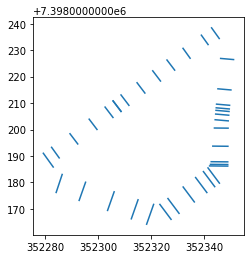

In [217]:
gdf_conexoes = gpd.GeoDataFrame(gdf_pontos_lotes, geometry=gdf_pontos_lotes.geometry.apply(lambda x: LineString(nearest_points(x, gdf_vias.unary_union))))
gdf_conexoes.plot()

## Relacionando as linhas aos lotes e ao viário

In [219]:
gdf_vias_buffered = gpd.GeoDataFrame(gdf_vias, geometry=gdf_vias.buffer(0.5))

In [222]:
gdf_conexoes_relacionadas = gpd.sjoin(gdf_conexoes.drop(columns=['index_right']), gdf_vias_buffered, how='left', op='intersects')

In [223]:
gdf_conexoes_relacionadas

lo_quadra_left lo_setor_left  \
0 0             399           140   
  1             399           140   
  2             399           140   
  3             399           140   
  4             399           140   
  5             399           140   
  6             399           140   
  7             399           140   
  8             399           140   
  9             399           140   
  10            399           140   
  11            399           140   
  12            399           140   
  13            399           140   
  14            399           140   
  15            399           140   
  16            399           140   
  17            399           140   
  18            399           140   
  19            399           140   
  20            399           140   
  21            399           140   
  22            399           140   
  23            399           140   
  24            399           140   
  25            399           140   
  26            399           140   
  27            399           140   
  28            399           140   
  29            399           140   
  30            399           140   
  31            399           140   
  32            399           140   
  33            399           140   
  34            399           140   
  35            399           140   
  36            399           140   

                                               geometry lo_setor_right  \
0 0   LINESTRING (352306.168 7398176.722, 352303.497...            140   
  1   LINESTRING (352295.365 7398180.330, 352292.758...            140   
  2   LINESTRING (352286.520 7398183.284, 352284.072...            140   
  3   LINESTRING (352283.209 7398185.597, 352279.148...            140   
  4   LINESTRING (352285.469 7398189.044, 352282.273...            140   
  5   LINESTRING (352292.488 7398194.320, 352289.216...            140   
  6   LINESTRING (352299.765 7398199.790, 352296.463...            140   
  7   LINESTRING (352305.804 7398204.329, 352302.477...            140   
  8   LINESTRING (352308.842 7398206.613, 352305.502...            140   
  9   LINESTRING (352308.859 7398206.626, 352305.520...            140   
  10  LINESTRING (352311.825 7398208.909, 352308.499...            140   
  11  LINESTRING (352317.863 7398213.557, 352314.564...            140   
  12  LINESTRING (352323.761 7398218.097, 352320.489...            140   
  13  LINESTRING (352329.117 7398222.220, 352325.870...            140   
  14  LINESTRING (352334.949 7398226.709, 352331.938...            140   
  15  LINESTRING (352341.741 7398231.873, 352338.871...            140   
  16  LINESTRING (352345.949 7398234.163, 352342.735...            140   
  17  LINESTRING (352346.042 7398226.884, 352351.490...            140   
  18  LINESTRING (352345.015 7398215.403, 352350.490...            140   
  19  LINESTRING (352344.496 7398209.609, 352349.985...            140   
  20  LINESTRING (352344.372 7398208.224, 352349.864...            140   
  21  LINESTRING (352344.287 7398207.267, 352349.780...            140   
  22  LINESTRING (352344.161 7398205.861, 352349.658...            140   
  23  LINESTRING (352343.969 7398203.719, 352349.471...            140   
  24  LINESTRING (352343.687 7398200.566, 352349.421...            140   
  25  LINESTRING (352343.075 7398193.724, 352349.353...            140   
  26  LINESTRING (352342.473 7398187.838, 352349.294...            140   
  27  LINESTRING (352342.202 7398186.838, 352349.284...            140   
  28  LINESTRING (352341.867 7398186.239, 352349.278...            140   
  29  LINESTRING (352341.375 7398185.709, 352346.019...            140   
  30  LINESTRING (352339.646 7398184.321, 352344.245...            140   
  31  LINESTRING (352336.692 7398182.077, 352341.276...            140   
  32  LINESTRING (352331.982 7398178.501, 352336.543...            140   
  33  LINESTRING (352326.237 7398174.139, 352330.769...            140   
  34  LI

## Resultados

Dessa forma então é possivel determinar para quantas e quais vias cada lote se relaciona restando ainda por processar a geometria de cada uma das faces se for conveniente

In [233]:
gdf_conexoes_relacionadas.lg_seg_id.values

array([ 8739,  8739,  8739, 10207, 10207, 10207, 10207, 10207, 10207,
       10207, 10207, 10207, 10207, 10207, 10207, 10207, 10207,  9412,
        9412,  9412,  9412,  9412,  9412,  9412,  9412,  9412,  9412,
        9412,  9412, 11422, 11422, 11422, 11422, 11422, 11422,  8739,
        8739], dtype=int64)

<AxesSubplot:>

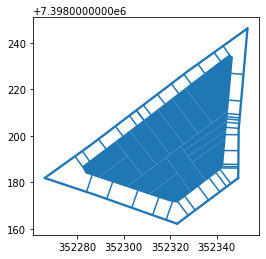

In [238]:
ax = gdf_lotes_poc.plot()
gdf_vias[gdf_vias.lg_seg_id.isin(gdf_conexoes_relacionadas.lg_seg_id.values)].plot(ax=ax)
gdf_conexoes.plot(ax=ax)

,lg_codlog,lg_tipo,lg_titulo,lg_prep,lg_nome,lg_or_deno,lg_ind_ofi,lg_ini_par,lg_fim_par,lg_ini_imp,lg_fim_imp,lg_ordem,lg_id,lg_seg_id,lg_or_geom,geometry
0,239011,R,None,None,NABICA,None,OFICIAL,0,130,1,131,1,53740.0,10250,None,"POLYGON ((352314.309 7398123.007, 352314.310 7..."
1,239208,R,None,None,DILERMANDO PINHEIRO,None,OFICIAL,66,124,67,125,2,53759.0,9412,None,"POLYGON ((352349.946 7398202.926, 352349.736 7..."
2,074462,R,None,None,FRANCISCO GARCIA,None,OFICIAL,136,146,137,147,4,37119.0,11421,None,"POLYGON ((352313.082 7398154.215, 352313.041 7..."
3,074462,R,None,None,FRANCISCO GARCIA,None,OFICIAL,0,38,1,39,1,37119.0,10560,None,"POLYGON ((352417.618 7398233.691, 352402.705 7..."
4,145688,R,None,None,NICOLAU CAMPANELLA,None,OFICIAL,0,60,1,61,1,44329.0,9655,None,"POLYGON ((352234.010 7398222.246, 352234.022 7..."
5,239186,R,None,None,BRUNO KIEFER,None,OFICIAL,0,170,1,171,1,53757.0,9413,None,"POLYGON ((352190.166 7398257.808, 352107.004 7..."
6,145688,R,None,None,NICOLAU CAMPANELLA,None,OFICIAL,60,116,61,117,2,44329.0,9400,None,"POLYGON ((352298.346 7398269.316, 352298.387 7..."
7,239143,R,None,None,JOSE MOZART DE ARAUJO,None,OFICIAL,108,184,109,185,2,53753.0,10206,None,"POLYGON ((352241.142 7398163.369, 352206.733 7..."
8,162078,R,None,None,LACOS DE OURO,None,OFICIAL,548,578,549,579,5,45992.0,3293,None,"POLYGON ((352298.801 7398269.386, 352298.847 7..."
9,512443,PC,None,None,JOAQUIM DOMINGOS GREGO,None,OFICIAL,14,14,15,15,1,78504.0,2852,None,"POLYGON ((352418.610 7398340.064, 352418.617 7..."
